In [1]:
# import cv2
# import numpy as np
# # from ultralytics import YOLO

# cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")
# timestamps = [cap.get(cv2.CAP_PROP_POS_MSEC)]

# width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# filter_out = cv2.VideoWriter(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_filter.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 15, (width, height))

# prev_frame_grey = None
# wakeup_time_left = 0

# while cap.isOpened():
#     ret, frame =  cap.read()
#     if not ret:
#         break
    
   
#     frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
#     if prev_frame_grey is None:
#         prev_frame_grey = frame_grey   
    
#     frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
    
#     _, filter_frame = cv2.threshold(frame_difference, 30, 255, cv2.THRESH_BINARY)
    
#     cv2.imshow("Filtered", filter_frame)
        
#     pixels_changed = np.sum(filter_frame)/255

#     # print(timestamps)
    
#     if pixels_changed > 5000:
#         filter_out.write(filter_frame)
#         timestamps.append(cap.get(cv2.CAP_PROP_POS_MSEC))
    
#     prev_frame_grey = frame_grey
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# filter_frame.release()

# Filter Analysis

In [ ]:
import cv2
import numpy as np
# from ultralytics import YOLO

raw_cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_raw.mp4")
filter_cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_filter_raw.mp4")

timestamps = [raw_cap.get(cv2.CAP_PROP_POS_MSEC)]

width = int(raw_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(raw_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

prev_frame_grey = None
wakeup_time_left = 0

frame = 0
while raw_cap.isOpened():
    # print(frame)
    frame += 1
    ret, raw_frame =  raw_cap.read()
    _, filter_frame = filter_cap.read()
    
    if not ret:
        break
    
    filter_frame = cv2.cvtColor(filter_frame, cv2.COLOR_BGR2GRAY)
    pixels = (filter_frame>30).sum()
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Threshold Histogram

In [ ]:
import cv2
import numpy as np
# from ultralytics import YOLO

cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# filter_out = cv2.VideoWriter(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_filter.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 15, (width, height))
# filter_raw = cv2.VideoWriter(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_filter_raw.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 15, (width, height))
# raw_out = cv2.VideoWriter(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_raw.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 15, (width, height))

key_frames = [1, 17, 99, 258, 277, 331, 333, 361, 383, 444, 461, 538, 577, 595, 618, 647, 704, 726, 742, 768, 818, 844, 878, 892, 910, 1018, 1104, 1127, 1186, 1205, 1224, 1289, 1334, 1358, 1379, 1394, 1406, 1433, 1446, 1484, 
 1492, 1533, 1563, 1677, 1690, 1717, 1741, 1776, 1859, 2700, 2791, 2823, 2836, 2866, 2944, 2998, 3033, 3054, 3085, 3172, 3179, 3308, 3342, 3439, 3599, 3623, 3638, 3690, 3696, 3817, 3837, 3915, 3925, 3956, 3976, 
 4098, 4135, 4170, 4192, 4213, 4246, 4272, 4301, 4315, 4320, 4340, 4362, 4389, 4394, 4444, 4464, 4483, 4484]
END = 4626
key_frames_raw = []

prev_frame_grey = None
wakeup_time_left = 0

frame_num = 1
raw_frame_num = 0
is_correct = False
while cap.isOpened():
    ret, frame =  cap.read()
    if not ret:
        break
    
    frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
    if prev_frame_grey is None:
        prev_frame_grey = frame_grey   
    
    frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
    
    _, filter_frame = cv2.threshold(frame_difference, 30, 255, cv2.THRESH_BINARY)
    
    pixels_changed = np.sum(filter_frame)/255

    # print(timestamps)
    
    if pixels_changed > 5000:
        # filter_frame = cv2.cvtColor(filter_frame, cv2.COLOR_GRAY2BGR)
        # filter_raw.write(filter_frame)
        
        # cv2.putText(filter_frame, f"pixels: {int(pixels_changed)}", (0,25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 3)  
        # cv2.putText(filter_frame, f"{raw_frame_num}", (width-100,25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 3)
        # cv2.imshow("Filtered", filter_frame)
    
        # cv2.putText(frame, f"{frame_num}", (width-100,25), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 3)
        
        if frame_num in key_frames:
            is_correct = not is_correct
            key_frames_raw.append(raw_frame_num)
        if frame_num == END:
            break
        frame_num += 1
    else:
        if is_correct:
            key_frames_raw.append(raw_frame_num)
            is_correct = not is_correct
        # raw_out.write(frame)
        # filter_out.write(filter_frame)
        # timestamps.append(cap.get(cv2.CAP_PROP_POS_MSEC))
    
    prev_frame_grey = frame_grey
    
    raw_frame_num += 1
    
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# with open("timestamps.txt", "w") as f:
#     print(len(timestamps))
#     f.write(str(timestamps))
    
cap.release()
# raw_out.release()
# filter_out.release()
# filter_raw.release()

In [48]:
# # END = 81909
# # key_frames_raw = key_frames_raw - 1
# np.save(r"data\key_frames_raw_02_26.npy", key_frames_raw)
key_frames_raw = [190, 204, 3792, 3814, 4082, 4107, 5072, 5732, 6134, 6151, 6315, 6335, 6731, 6761, 6923, 6949, 7371, 7395, 8363, 8378, 8463, 8480, 8729, 8751, 8763, 8786, 9606, 9636, 11572, 11589, 12262, 12290, 16232, 16252,
                  16789, 16814, 19273, 19295, 20324, 20336, 24327, 24652, 26378, 26400, 27571, 27589, 28885, 28915, 29521, 29577, 32584, 32606, 33302, 33316, 34087, 34112, 34538, 34574, 35277, 35304, 35812, 35822, 37139, 37150,
                  37375, 37394, 37438, 37471, 38055, 38099, 38893, 38919, 39676, 39709, 42466, 45304, 51931, 51962, 52572, 52602, 55201, 55220, 55314, 55347, 56192, 56211, 56393, 56421, 58022, 58047, 58574, 58602, 59606, 60252,
                  63461, 63485, 63822, 63848, 64165, 64954, 64982, 69540, 69562, 70092, 70118, 71213, 71235, 71454, 71480, 72003, 72033, 72137, 72166, 72236, 72250, 72310, 72325, 73551, 73565, 73802, 74207, 74516, 74545, 75168,
                  75698, 75943, 76005, 77325, 77345, 78097, 78122, 78930, 78943, 79166, 79187, 79793, 79805, 80257, 80270, 80483, 80511, 81038, 81056, 81847, 81864, 81908, 81951]

In [30]:
import cv2
import numpy as np

num_of_pixels_changed = []
cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


prev_frame_grey = None
raw_frame_num = 0

# threshold_data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if prev_frame_grey is None:
        prev_frame_grey = frame_grey  
    
    frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
    
    prev_frame_grey = frame_grey
    
    _, filter_frame = cv2.threshold(frame_difference, 30, 255, cv2.THRESH_BINARY)
    
    pixels_changed = np.sum(filter_frame)/255
    
    num_of_pixels_changed.append(pixels_changed)
    
    if raw_frame_num == key_frames_raw[-1]:
        break
            
    raw_frame_num += 1
    
cap.release()    
threshold_data.append(num_of_pixels_changed)

cap.release()

KeyboardInterrupt: 

In [31]:
import cv2
import numpy as np
from tqdm import tqdm
# from ultralytics import YOLO

pixel_value_thresholds = np.linspace(0, 100, 11)

threshold_data = []

for pixel_threshold in tqdm(pixel_value_thresholds):
    num_of_pixels_changed = []
    cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


    prev_frame_grey = None
    raw_frame_num = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        if prev_frame_grey is None:
            prev_frame_grey = frame_grey  
        
        frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
        
        prev_frame_grey = frame_grey
        
        _, filter_frame = cv2.threshold(frame_difference, pixel_threshold, 255, cv2.THRESH_BINARY)
        
        pixels_changed = np.sum(filter_frame)/255
        
        num_of_pixels_changed.append(pixels_changed)
        
        if raw_frame_num == key_frames_raw[-1]:
            break
                
        raw_frame_num += 1
        
    cap.release()    
    threshold_data.append(num_of_pixels_changed)
    
    cap.release()


100%|██████████| 11/11 [44:52<00:00, 244.77s/it]


In [732]:
import numpy as np
# np.save(r"data\threshold_data_new.npy", threshold_data)
# pixel_value_thresholds
threshold_data = np.load(r"data\threshold_data.npy")
threshold_data
# np.linspace(0, 250, 26)

array([[0.00000e+00, 5.10317e+05, 4.43534e+05, ..., 5.54466e+05,
        5.74100e+05, 5.36015e+05],
       [0.00000e+00, 4.17000e+02, 6.87000e+02, ..., 2.15600e+03,
        8.14900e+03, 2.65660e+04],
       [0.00000e+00, 1.00000e+00, 1.80000e+02, ..., 7.59000e+02,
        5.50800e+03, 2.07210e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 5.90000e+01, ..., 0.00000e+00,
        4.68000e+02, 2.73400e+03],
       [0.00000e+00, 0.00000e+00, 4.00000e+01, ..., 0.00000e+00,
        2.56000e+02, 1.66900e+03],
       [0.00000e+00, 0.00000e+00, 2.30000e+01, ..., 0.00000e+00,
        1.21000e+02, 1.11000e+03]])

In [52]:
is_correct_key_frames = []
print(len(key_frames_raw))
for i in range(0, 146, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))
is_correct_key_frames
    

147


[np.int64(190),
 np.int64(191),
 np.int64(192),
 np.int64(193),
 np.int64(194),
 np.int64(195),
 np.int64(196),
 np.int64(197),
 np.int64(198),
 np.int64(199),
 np.int64(200),
 np.int64(201),
 np.int64(202),
 np.int64(203),
 np.int64(204),
 np.int64(3792),
 np.int64(3793),
 np.int64(3794),
 np.int64(3795),
 np.int64(3796),
 np.int64(3797),
 np.int64(3798),
 np.int64(3799),
 np.int64(3800),
 np.int64(3801),
 np.int64(3802),
 np.int64(3803),
 np.int64(3804),
 np.int64(3805),
 np.int64(3806),
 np.int64(3807),
 np.int64(3808),
 np.int64(3809),
 np.int64(3810),
 np.int64(3811),
 np.int64(3812),
 np.int64(3813),
 np.int64(3814),
 np.int64(4082),
 np.int64(4083),
 np.int64(4084),
 np.int64(4085),
 np.int64(4086),
 np.int64(4087),
 np.int64(4088),
 np.int64(4089),
 np.int64(4090),
 np.int64(4091),
 np.int64(4092),
 np.int64(4093),
 np.int64(4094),
 np.int64(4095),
 np.int64(4096),
 np.int64(4097),
 np.int64(4098),
 np.int64(4099),
 np.int64(4100),
 np.int64(4101),
 np.int64(4102),
 np.int64(41

In [159]:
pixel_count_thresholds = np.linspace(0, 10000, 101)
key_frames_raw = np.array(key_frames_raw)
precision_scores = np.zeros((11, 101))
recall_scores = np.zeros((11, 101))
f2_scores = np.zeros((11, 101))

for i, pt in enumerate(pixel_value_thresholds):
    cap_data = np.array(threshold_data[i])

    for j, pixel_count_thresh in enumerate(pixel_count_thresholds):
        print(f"Pixel threshold: {pt}, Pixel Count Threshold: {pixel_count_thresh}")
        cap_data_selected = cap_data > pixel_count_thresh
        TP = np.sum(cap_data_selected[is_correct_key_frames])
        FP = np.sum(cap_data_selected) - TP
        FN = np.sum((~cap_data_selected)[is_correct_key_frames])
        precision = TP/(TP+FP)
        recall = TP/(TP+FN)
        
        print(f"Precision: {precision}, Recall: {recall}")
        
        # F2 = 5/((4/recall)+1/precision)
        F1 = 2*(recall*precision)/(precision+recall)
        
        precision_scores[i, j] = precision
        recall_scores[i, j] = recall
        f2_scores[i, j] = F1
        
        print(f"F2 Score: {F1}")

        
# f1_scores = np.zeros((10, ))

Pixel threshold: 0.0, Pixel Count Threshold: 0.0
Precision: 0.2644098810612992, Recall: 1.0
F2 Score: 0.41823444283646893
Pixel threshold: 0.0, Pixel Count Threshold: 100.0
Precision: 0.2644098810612992, Recall: 1.0
F2 Score: 0.41823444283646893
Pixel threshold: 0.0, Pixel Count Threshold: 200.0
Precision: 0.2644098810612992, Recall: 1.0
F2 Score: 0.41823444283646893
Pixel threshold: 0.0, Pixel Count Threshold: 300.0
Precision: 0.2644098810612992, Recall: 1.0
F2 Score: 0.41823444283646893
Pixel threshold: 0.0, Pixel Count Threshold: 400.0
Precision: 0.2644098810612992, Recall: 1.0
F2 Score: 0.41823444283646893
Pixel threshold: 0.0, Pixel Count Threshold: 500.0
Precision: 0.2644098810612992, Recall: 1.0
F2 Score: 0.41823444283646893
Pixel threshold: 0.0, Pixel Count Threshold: 600.0
Precision: 0.2644098810612992, Recall: 1.0
F2 Score: 0.41823444283646893
Pixel threshold: 0.0, Pixel Count Threshold: 700.0
Precision: 0.2644098810612992, Recall: 1.0
F2 Score: 0.41823444283646893
Pixel thre

In [54]:
# f1_scores[np.isnan(f1_scores)] = 0
pixel_count_thresholds

array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
         800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
        1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
        2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
        3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
        4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
        4800.,  4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,
        5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,
        6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.,  7100.,
        7200.,  7300.,  7400.,  7500.,  7600.,  7700.,  7800.,  7900.,
        8000.,  8100.,  8200.,  8300.,  8400.,  8500.,  8600.,  8700.,
        8800.,  8900.,  9000.,  9100.,  9200.,  9300.,  9400.,  9500.,
        9600.,  9700.,  9800.,  9900., 10000.])

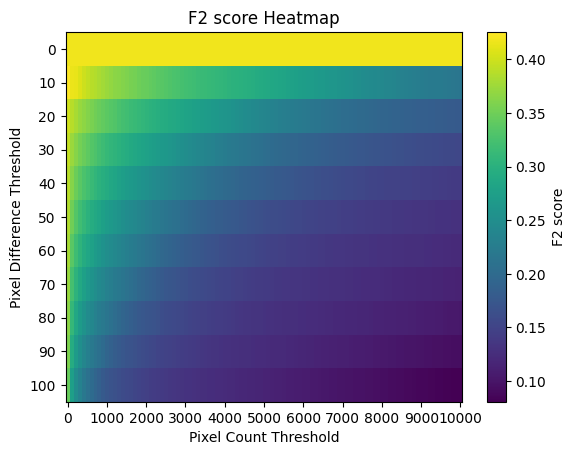

In [161]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
plt.imshow(f2_scores, interpolation='nearest', cmap='viridis', aspect="auto")
plt.title('F2 score Heatmap')
plt.xlabel('Pixel Count Threshold')
plt.ylabel('Pixel Difference Threshold')
plt.colorbar(label='F2 score')
plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
plt.yticks(ticks=np.arange(len(pixel_value_thresholds)), labels=np.array(pixel_value_thresholds, dtype=np.int64))
plt.show()

In [73]:
np.argmax(f2_scores)
# f2_scores[2, 94]
# pixel_count_thresholds[94]

np.int64(1110)

# Analysis of the pixel thresholds wrt to time

In [3]:
import numpy as np
# np.save(r"data\threshold_data.npy", threshold_data)
# pixel_value_thresholds
threshold_data = np.load(r"data\threshold_data.npy")
key_frames_raw = np.load(r"data\key_frames_raw_02_26.npy")

is_correct_key_frames = []
for i in range(0, 182, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))
print(is_correct_key_frames[-1])
threshold_data.shape
# np.linspace(0, 250, 26)

# There is 192min of footage from the captured images from 2:38pm to 5:50pm

81952


(11, 83069)

In [4]:
pixel_value_thresholds = np.linspace(0, 100, 11)
pixel_count_thresholds = np.linspace(0, 10000, 101)
key_frames_raw = np.array(key_frames_raw)
precision_scores = np.zeros((11, 101, 100))
recall_scores = np.zeros((11, 101, 100))
f2_scores = np.zeros((11, 101, 100))
events = np.zeros((11, 101, 100))
buckets = np.linspace(0, 81952, 101, dtype=np.int32)
for i, pt in enumerate(pixel_value_thresholds):
    # if pt != 20:
    #     continue
    cap_data = np.array(threshold_data[i])

    for j, pixel_count_thresh in enumerate(pixel_count_thresholds):
        # if pixel_count_thresh != 9400:
        #     continue
        print(f"Pixel threshold: {pt}, Pixel Count Threshold: {pixel_count_thresh}")
        cap_data_selected = cap_data > pixel_count_thresh
        
        for b in range(100):
            start = buckets[b]
            end = buckets[b+1]
            ickfftb = (is_correct_key_frames >= start) & (is_correct_key_frames < end)
            ickfftb = np.array(is_correct_key_frames)[ickfftb]
            
            # TP = np.sum((cap_data_selected[ickfftb]))
            event_triggers = np.sum(cap_data_selected[start:end])
            events[i, j, b] = event_triggers
            # FN = np.sum(((~cap_data_selected)[ickfftb]))
            
            # print(TP, FP, FN)
                  
            # if (TP==0) and (FP==0) and (FN==0):
            #     # precision_scores[i, j, b] = 0
            #     # recall_scores[i, j, b] = 0
            #     # f2_scores[i, j, b] = 0
            #     print("No events here")
            
            # precision = TP/(TP+FP)
            # recall = TP/(TP+FN)
        
            # # print(f"Bucket: {b}, Precision: {precision}, Recall: {recall}")
        
            # F2 = (1+2**2)*(precision*recall)/((2**2)*precision+recall)
            # precision_scores[i, j, b] = precision
            # recall_scores[i, j, b] = recall
            # f2_scores[i, j, b] = F2
            
            # print(f"Bucket {b}, F2 Score: {F2}")

        
# f1_scores = np.zeros((10, ))

Pixel threshold: 0.0, Pixel Count Threshold: 0.0
Pixel threshold: 0.0, Pixel Count Threshold: 100.0
Pixel threshold: 0.0, Pixel Count Threshold: 200.0
Pixel threshold: 0.0, Pixel Count Threshold: 300.0
Pixel threshold: 0.0, Pixel Count Threshold: 400.0
Pixel threshold: 0.0, Pixel Count Threshold: 500.0
Pixel threshold: 0.0, Pixel Count Threshold: 600.0
Pixel threshold: 0.0, Pixel Count Threshold: 700.0
Pixel threshold: 0.0, Pixel Count Threshold: 800.0
Pixel threshold: 0.0, Pixel Count Threshold: 900.0
Pixel threshold: 0.0, Pixel Count Threshold: 1000.0
Pixel threshold: 0.0, Pixel Count Threshold: 1100.0
Pixel threshold: 0.0, Pixel Count Threshold: 1200.0
Pixel threshold: 0.0, Pixel Count Threshold: 1300.0
Pixel threshold: 0.0, Pixel Count Threshold: 1400.0
Pixel threshold: 0.0, Pixel Count Threshold: 1500.0
Pixel threshold: 0.0, Pixel Count Threshold: 1600.0
Pixel threshold: 0.0, Pixel Count Threshold: 1700.0
Pixel threshold: 0.0, Pixel Count Threshold: 1800.0
Pixel threshold: 0.0, Pi

[ 15.   1.   0.  25.  38.  11.  69.  53.  62.  21.  83.  28.  14.   0.
  52.  28.   0.   1.   0.  21.  48.   0.   0.  46.  13.   0.   0.   0.
   0.  32. 118.   0.  50.  32.   0.  30.  33.   3.   2.  25.  25.  33.
  42.  39.  19.  66.  44.  31.  34.  21.   2.  94.  19. 296. 292.  76.
   0.   0.   0.   0.   0.  18.   0.  33.  31.   3.  28.  58.  83.   0.
  26.  29.  55.  55.   1.   5.   0.  52.  14.  55.   0.   4.  15.  26.
  24.  28.  24.  61.  61.  18.  69.  89.  78.   0.  23.  48.  44.  34.
  49.  65.]


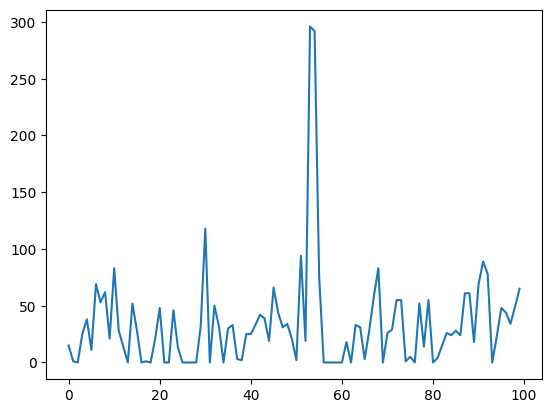

In [5]:
import matplotlib.pyplot as plt

# print(81858 in is_correct_key_frames)
# print(precision_scores[2, 94])
# plt.figure(figsize=(10, 8))
threshold_data_cut = threshold_data[2, :81952]
print( events[2, 94, :])
# times = np.linspace(0, 81952, 100)
# for i, time in times:
#     threshold_data
plt.plot(np.arange(100), events[2, 94, :])
# plt.hist(threshold_data[2,:81952], np.linspace(0, 81592, 100))
# plt.imshow(recall_scores[2])
# plt.plot(buckets[:-1], recall_scores[2, 94])
# recall_scores[2, 94]
# plt.title('F2 score Heatmap')
# plt.xlabel('Pixel Count Threshold')
# plt.ylabel('Pixel Difference Threshold')
# plt.colorbar(label='F2 score')

# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# plt.yticks(ticks=np.arange(len(pixel_value_thresholds)), labels=np.array(pixel_value_thresholds, dtype=np.int64))
# plt.show()

-292


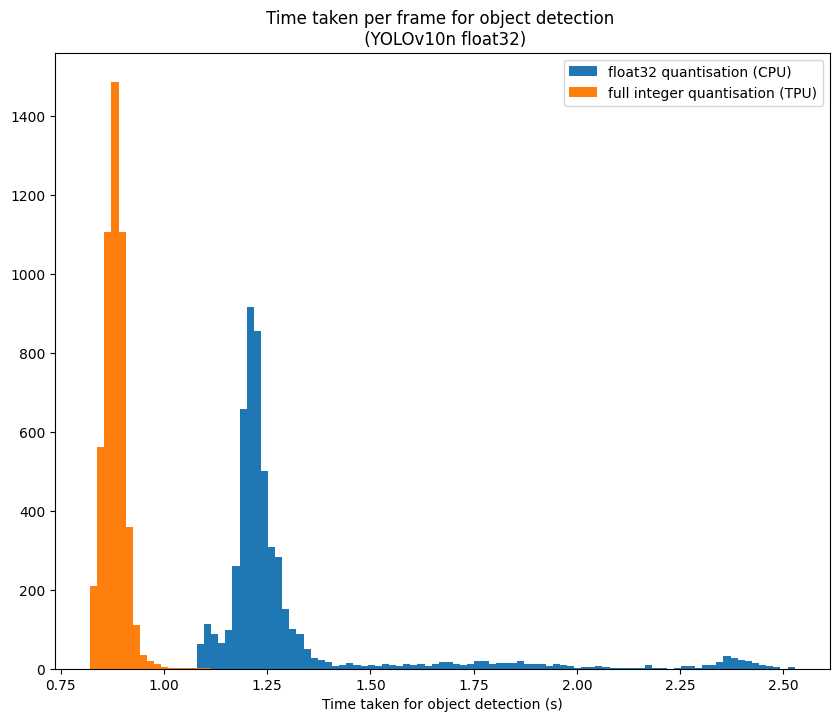

In [12]:
import scipy
import scipy.special
import numpy as np
import matplotlib.pyplot as plt

detection_times = []
with open(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\node\cam2_always_on.out", "r") as f:
    for line in f:
        line = line.strip().split(" ")
        if len(line) == 5:
            try:
                detection_times.append(float(line[-1][:-2])/1000)
            except:
                pass
detection_times = np.array(detection_times)

detection_times_tpu = [] 
with open(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\tpu.log", "r") as f:
    for line in f:
        line = line.strip().split(" ")
        if len(line) == 5:
            try:
                detection_times_tpu.append(float(line[-1][:-2])/1000)
            except:
                pass

print(len(detection_times_tpu)- len(detection_times))

plt.figure(figsize=(10, 8))
data_min, data_max = min(min(detection_times), min(detection_times_tpu)), max(max(detection_times_tpu), max(detection_times))
plt.hist(detection_times, np.linspace(data_min, data_max, 100), label="float32 quantisation (CPU)")
plt.hist(detection_times_tpu, np.linspace(data_min, data_max, 100), label="full integer quantisation (TPU)")
plt.legend()

plt.title('Time taken per frame for object detection \n (YOLOv10n float32)')
plt.xlabel('Time taken for object detection (s)')
# plt.ylabel('')
# plt.colorbar(label='F2 score')

# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# plt.xticks(ticks=np.linspace(1, 3, 10), labels=np.linspace(0, 3, 10))
plt.show()
# print(np.mean(np.array(detection_times)))

In [24]:
print(np.median(detection_times))

# detection_times_tpu
mean = np.mean(np.random.choice(detection_times, size=(len(detection_times), 1000)), axis=0)
print(np.median(mean))
scipy.stats.t.interval(0.95, len(mean)-1, loc=np.median(mean), scale=scipy.stats.sem(mean))

1.2247000000000001
1.30902575843226


(np.float64(1.3087993300708354), np.float64(1.3092521867936846))

In [ ]:
import scipy
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


m, l, h = mean_confidence_interval(detection_times)

# h, l = scipy.stats.t.interval(0.95, len(detection_times)-1, loc=np.mean(detection_times), scale=scipy.stats.sem(detection_times))
h, l

# Buffer size

In [695]:
key_frames_raw = [71600,71668,72175,72196,73034,73093,73799,73825,75222,75490,80327,80351,80983,81040,82485,82518,83006,83097]

with open(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\cam1 copy.log", "r") as f:
    time_between_events = []
    time_during_events = []
    time_to_capture = []
    previous_event = 0
    current_event_start = 0
    current_frame = 0
    for line in f:
        line = line.strip().split(" ")
        # print(line)
        if line[-3] == "Current" and line[-2] == "frame:":
            current_frame = int(line[-1])
        elif line[-3] == "for" and line[-2] == "frame:":
            if current_frame == (previous_event+1):
                previous_event = current_frame
            else:
                print(f"from: {current_event_start}, to: {previous_event}, now: {current_frame}")
                time_during_events.append(previous_event-current_event_start+1)
                time_between_events.append(current_frame-previous_event)
                current_event_start = current_frame
                previous_event = current_frame
                
            if current_event_start == 0:
                current_event_start = current_frame 
        elif line[-3] == "process" and line[-2] == "frame:":
            time_to_capture.append(float(line[-1][:-1]))

time_between_events = time_between_events[1:]
print(time_to_capture)

# event_triggered = np.load(r"data\triggered_events_for_may_01_prelim.npy")
# time_during_events = np.array([68, 21, 59, 26, 268, 24, 57, 33, 91, 14, 33, 85, 20, 97, 30, 91, 32, 80, 29, 37, 116, 160, 
#                                25, 59, 58, 19, 60, 215, 17, 149, 28, 75, 15, 64, 28, 58, 18, 11]) #  22,   25,  660,   17,   20,   30,   26,   24,   15,   17,   22,   23,   30,
#    17,   28,   20,   25,   22,   12,  325,   22,   18,   30,   56,   22,   14,   25, 36,   27,   10,   11,   19,   33,   44,   26,   33, 2838,   31,
#    30,   19,   33, 19,   28,   25,   28,  646,   24,   26,  789, 4558,  530, 1095,  219,  523,  104,
#    70,   60, 1226,  237,  309,  623,  245, 1320,  752,  808, 223,  606,  452,  213, 527,  791,   44])
# print(t.interval(0.95, len(time_during_events)-1, loc=np.mean(time_during_events), scale=sem(time_during_events))-time_during_events.mean())
# print(np.median(time_during_events))

is_correct_key_frames = []
for i in range(0, 17, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))
is_correct_key_frames = np.array(is_correct_key_frames)-71600

from: 0, to: 0, now: 190
from: 190, to: 204, now: 1612
from: 1612, to: 1614, now: 1645
from: 1645, to: 1645, now: 1649
from: 1649, to: 1649, now: 1651
from: 1651, to: 1651, now: 1653
from: 1653, to: 1653, now: 1669
from: 1669, to: 1671, now: 1673
from: 1673, to: 1673, now: 1686
from: 1686, to: 1686, now: 1690
from: 1690, to: 1690, now: 1892
from: 1892, to: 1894, now: 1905
from: 1905, to: 1905, now: 1909
from: 1909, to: 1909, now: 1913
from: 1913, to: 1913, now: 1915
from: 1915, to: 1915, now: 1918
from: 1918, to: 1918, now: 1921
from: 1921, to: 1925, now: 1928
from: 1928, to: 1931, now: 1933
from: 1933, to: 1933, now: 1936
from: 1936, to: 1936, now: 1939
from: 1939, to: 1939, now: 1945
from: 1945, to: 1945, now: 1955
from: 1955, to: 1955, now: 1957
from: 1957, to: 1958, now: 2996
from: 2996, to: 2999, now: 3001
from: 3001, to: 3001, now: 3008
from: 3008, to: 3050, now: 3792
from: 3792, to: 3814, now: 4082
from: 4082, to: 4105, now: 5072
from: 5072, to: 5088, now: 5091
from: 5091, to: 5

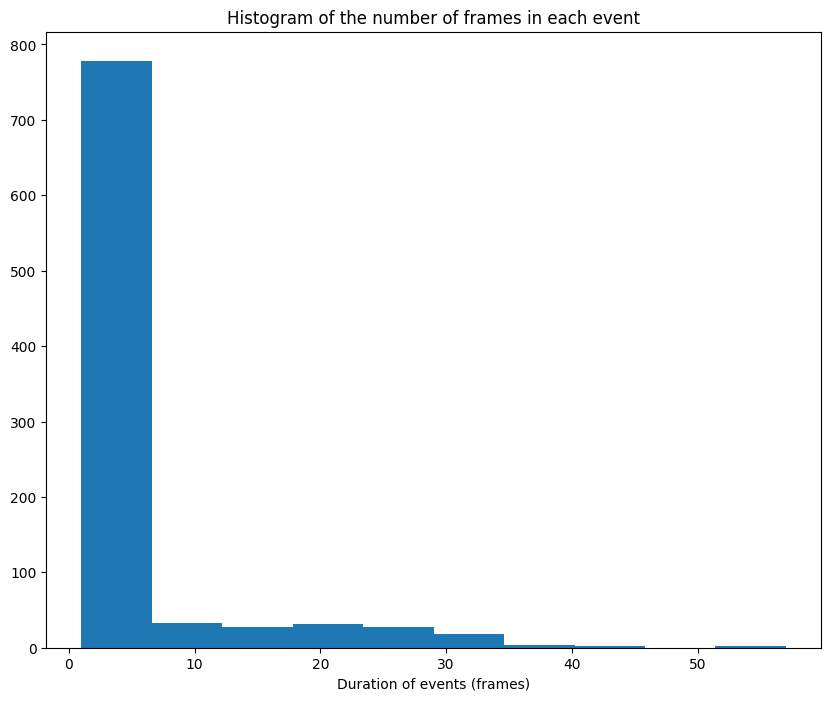

In [717]:
plt.figure(figsize=(10, 8))
plt.hist(time_during_events, 10)
plt.title('Histogram of the number of frames in each event')
plt.xlabel('Duration of events (frames)')
plt.ylabel('')
# plt.colorbar(label='F2 score')

# # plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# # plt.xticks(ticks=np.linspace(1, 3, 10), labels=np.linspace(0, 3, 10))
# plt.show()

# plt.figure(figsize=(10, 8))
# plt.hist(time_between_events, 10)
# plt.title('Histogram of the number of frames in between the start of each event')
# plt.xlabel('Duration (frames)')
# plt.ylabel('')
# plt.colorbar(label='F2 score')

# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# plt.xticks(ticks=np.linspace(1, 3, 10), labels=np.linspace(0, 3, 10))
plt.show()

In [718]:
medians = []
for i in range(1000):
    medians.append(np.mean(np.random.choice(time_during_events, len(time_during_events))))
medians = np.array(medians)
print(t.interval(0.95, len(medians)-1, loc=np.mean(medians), scale=sem(medians))-medians.mean())
print(medians.mean())

medians = []
for i in range(1000):
    medians.append(np.mean(np.random.choice(time_between_events, len(time_between_events))))
medians = np.array(medians)
print(t.interval(0.95, len(medians)-1, loc=np.mean(medians), scale=sem(medians))-medians.mean())
print(medians.mean())

medians = []
for i in range(1000):
    medians.append(np.median(np.random.choice(time_to_capture, len(time_to_capture))))
medians = np.array(medians)
print(t.interval(0.95, len(medians)-1, loc=np.mean(medians), scale=sem(medians))-medians.mean())
print(medians.mean())

[-0.01550258  0.01550258]
4.642798483206934
[-0.49886413  0.49886413]
86.1052809110629
[-2.27634099e-06  2.27634099e-06]
0.06521942400932312


In [ ]:
print(time_between_events)
print(time_during_events)

from scipy.stats import poisson
poisson.rvs(62.4)

[4, 36, 23, 6, 90, 14, 6, 16, 7, 3, 3, 20, 3, 360, 859, 3, 50, 520, 3, 3, 3, 12, 3, 3, 4, 3, 3, 16, 154, 1429, 25, 10, 123, 26, 47, 31, 404, 21, 1860, 6, 3, 8, 5, 5, 13, 8, 11, 13, 3, 3, 3, 9, 61, 3, 9, 27, 4, 17, 535, 101, 10, 18, 3, 5, 5, 9, 3, 3, 485, 7, 217, 3, 3, 8, 5, 3, 5, 6, 7, 3, 8, 685, 4, 60, 15, 3, 3, 3, 3, 15, 3, 4, 7, 141, 6, 100, 3, 5, 10, 11, 428, 3, 3, 3, 15, 4, 4, 20, 17, 5, 14, 5, 6, 4, 11, 7, 27, 4, 9, 3, 10, 9, 7, 6, 14, 33, 42, 6, 5, 6, 7, 9, 42, 3, 127, 348, 3, 9, 3, 3, 7, 16, 534, 3, 14, 5, 3, 3, 3, 3, 6, 3, 21, 5, 7, 3, 174, 3, 348, 176, 49, 174, 4, 5, 5, 3, 6, 4, 4, 7, 6, 5, 4, 9, 8, 7, 9, 5, 6, 8, 4, 4, 4, 4, 6, 4, 5, 10, 7, 8]
[1, 2, 6, 21, 4, 3, 9, 4, 14, 3, 1, 1, 1, 1, 1, 17, 1, 27, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 14, 10, 25, 3, 2, 4, 18, 4, 29, 1, 18, 4, 2, 1, 1, 1, 2, 10, 3, 1, 5, 1, 1, 1, 7, 1, 1, 7, 7, 2, 1, 1, 1, 7, 16, 1, 3, 1, 1, 1, 1, 1, 4, 16, 1, 1, 4, 3, 1, 3, 3, 3, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 5, 1, 4, 25, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2,

0

In [742]:
import random

key_frames_raw = [71600,72175,73034,73799,75222,80327,80983,82485,83006]

# time_between_events = np.array([1624, 6528, 2158, 4415, 8424, 2170, 1228, 917, 230, 3362, 1308, 2715, 1595, 5842, 9487, 745, 569, 3467, 3360, 250, 
#                                       707, 2433, 1379, 217, 884, 664, 1293, 667, ])
# time_between_entry_exit = np.array([470, 299, ])
# time_during_events = np.array([68, 21, 59, 26, 268, 24, 57, 33, 91, 14,   22,   25,  660,   17,   20,   30,   26,   24,   15,   17,   22,   23,   30,
#    17,   28,   20,   25,   22,   12,  325,   22,   18,   30,   56,   22,   14,   25, 36,   27,   10,   11,   19,   33,   44,   26,   33, 2838,   31,
#    30,   19,   33, 19,   28,   25,   28,  646,   24,   26,  789, 4558,  530, 1095,  219,  523,  104,
#    70,   60, 1226,  237,  309,  623,  245, 1320,  752,  808, 223,  606,  452,  213, 527,  791,   44])

num_of_simulations = 10
len_of_run = 10000
simulation = np.zeros((num_of_simulations, len_of_run))
for i in tqdm(range(num_of_simulations)):
    run = np.zeros(len_of_run)
    current_frame = 0
    while current_frame < len_of_run:
        # print(current_frame)
        entry = current_frame + np.random.choice(time_between_events)
        exit = entry + np.random.choice(time_during_events)
        if exit > len_of_run:
            exit = len_of_run
        run[entry:exit] = 1
        current_frame = exit
    simulation[i, :] = run

# detection_times
len_of_buffer = np.zeros((num_of_simulations, len_of_run))
for i in tqdm(range(num_of_simulations)):
    time_spent = 0
    time_to_detect = []
    for f in range(len_of_run):
        time_spent += random.choice(time_to_capture)
        if simulation[i, f] == 1:
            if time_to_detect == []:
                time_spent = 0
            time_to_detect.append(random.choice(detection_times))
        if time_to_detect != []:
            if time_to_detect[0] < time_spent:
                time_spent -= time_to_detect[0]
                time_to_detect.pop(0)

        len_of_buffer[i, f] = len(time_to_detect)

print(len_of_buffer)

100%|██████████| 10/10 [00:00<00:00, 138.45it/s]

[[  0.   0.   0. ...  93.  93.  93.]
 [  0.   0.   0. ... 106. 106. 106.]
 [  0.   0.   1. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 113. 113. 113.]
 [  0.   0.   1. ...   0.   0.   0.]
 [  0.   0.   0. ...  21.  21.  21.]]


In [728]:
max_len_buffer = np.max(len_of_buffer, axis=1)
print(t.interval(0.95, len(max_len_buffer)-1, loc=np.mean(max_len_buffer), scale=sem(max_len_buffer))-max_len_buffer.mean())
print(max_len_buffer.mean())

[-21.28567869  21.28567869]
177.23


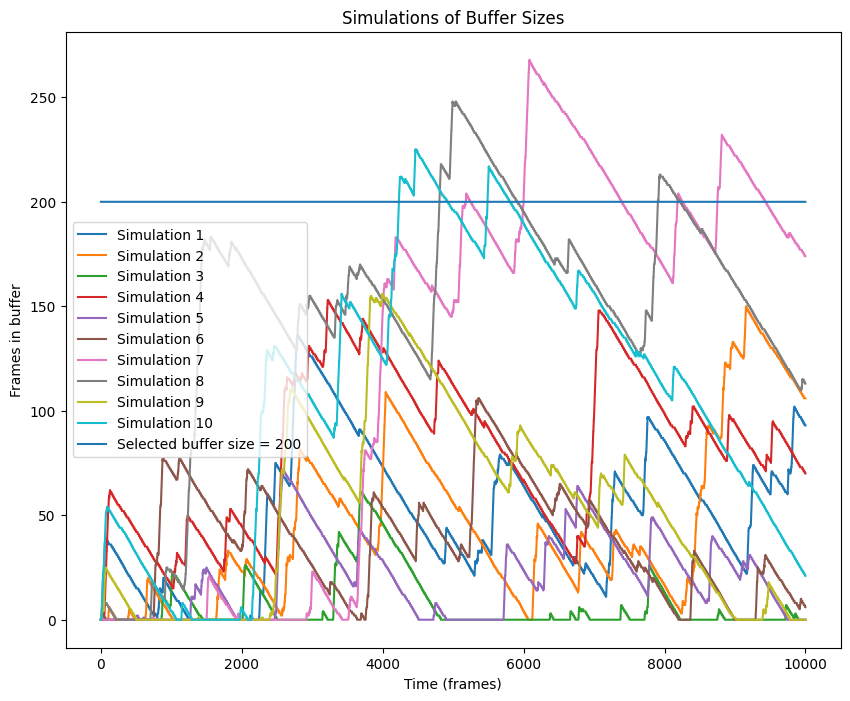

In [743]:
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(len_of_buffer[i], label=f"Simulation {i+1}")
plt.plot(np.ones(len_of_run)*200, label="Selected buffer size = 200")
plt.title('Simulations of Buffer Sizes')
plt.xlabel('Time (frames)')
plt.ylabel('Frames in buffer')
plt.legend()
# plt.colorbar(label='F2 score')

# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# plt.xticks(ticks=np.linspace(1, 3, 10), labels=np.linspace(0, 3, 10))
plt.show()



[    9    46    59    72    88   105   120   136   152   166   178   191
   206   221   237   253   269   285   302   320   337   353   369   384
   399   416   432   449   465   481   500   516   533   548   565   579
   590   605   620   636   653   669   685   702   719   737   754   771
   786   801   818   833   849   865   882   901   918   933   947   963
   977   991  1007  1022  1038  1052  1067  1082  1099  1115  1130  1146
  1162  1178  1195  1211  1228  1245  1260  1276  1295  1312  1329  1347
  1361  1380  1397  1413  1441  1455  1469  1486  1501  1518  1535  1550
  1566  1581  1598  1612  1627  1642  1656  1671  1687  1704  1720  1736
  1752  1768  1785  1802  1817  1831  1846  1860  1876  1891  1908  1926
  2010  2026  2041  2054  2070  2086  2102  2119  2135  2152  2168  2186
  2201  2214  2226  2241  2258  2273  2288  2305  2320  2335  2350  2366
  2382  2397  2413  2430  2447  2463  2479  2496  2512  2528  2546  2563
  2579  2594  2610  2627  2643  2661  2677  2693  2

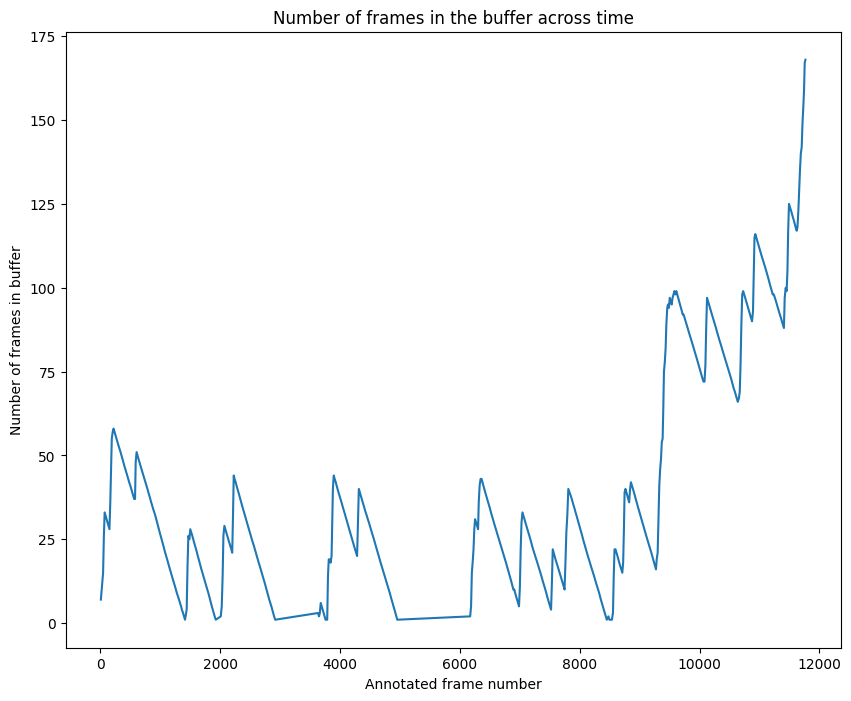

In [440]:
with open(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\cam1.log", "r") as f:
    frames_in_queue = []
    current_frame = 0
    frame_trigger = []
    for line in f:
        line = line.strip().split(" ")
        # print(line)
        if line[-3] == "Current" and line[-2] == "frame:":
            current_frame = int(line[-1])
        if line[-2] == "queue:":
            frames_in_queue.append(int(line[-1]))
            frame_trigger.append(current_frame)
print(np.array(frame_trigger[:614])-71600)
            
plt.figure(figsize=(10, 8))
plt.plot(np.array(frame_trigger[:614])-71600, np.array(frames_in_queue[:614]))
plt.title('Number of frames in the buffer across time')
plt.xlabel('Annotated frame number')
plt.ylabel('Number of frames in buffer')
# plt.colorbar(label='F2 score')

# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# plt.xticks(ticks=np.linspace(1, 3, 10), labels=np.linspace(0, 3, 10))
plt.show()



In [733]:
import random

distribution = np.array(detection_times)
cut_triggers = threshold_data[2] > 9400

num_of_simulations = 1
len_of_buffer = np.zeros((num_of_simulations, 81952))
for n in range(num_of_simulations):
    time_spent = 0
    time_to_detect = []
    for i in range(81952):
        if cut_triggers[i]:
            time_to_detect.append(random.choice(distribution))
        if cut_triggers[0] < time_spent:
            time_spent -= time_to_detect[0]
            time_to_detect.pop(0)
        if time_to_detect == []:
            time_spent = 0
        else:
            time_spent += 1/15
        len_of_buffer[n, i] = len(time_to_detect)

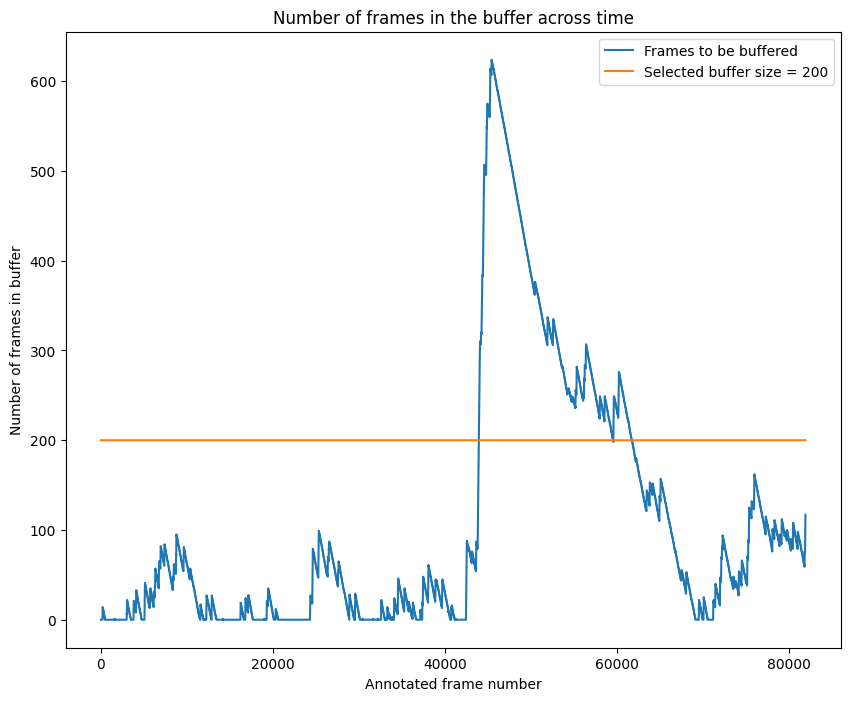

In [735]:
plt.figure(figsize=(10, 8))
plt.plot(len_of_buffer[0], label="Frames to be buffered")
plt.plot(np.ones(81952)*200, label="Selected buffer size = 200")
plt.title('Number of frames in the buffer across time')
plt.xlabel('Annotated frame number')
plt.ylabel('Number of frames in buffer')
plt.legend()
# plt.colorbar(label='F2 score')

# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# plt.xticks(ticks=np.linspace(1, 3, 10), labels=np.linspace(0, 3, 10))
plt.show()

In [406]:
key_frames_raw = [190, 204, 3792, 3814, 4082, 4107, 5072, 5732, 6134, 6151, 6315, 6335, 6731, 6761, 6923, 6949, 7371, 7395, 8363, 8378, 8463, 8480, 8729, 8751, 8763, 8786, 9606, 9636, 11572, 11589, 12262, 12290, 16232, 16252,
                  16789, 16814, 19273, 19295, 20324, 20336, 24327, 24652, 26378, 26400, 27571, 27589, 28885, 28915, 29521, 29577, 32584, 32606, 33302, 33316, 34087, 34112, 34538, 34574, 35277, 35304, 35812, 35822, 37139, 37150,
                  37375, 37394, 37438, 37471, 38055, 38099, 38893, 38919, 39676, 39709, 42466, 45304, 51931, 51962, 52572, 52602, 55201, 55220, 55314, 55347, 56192, 56211, 56393, 56421, 58022, 58047, 58574, 58602, 59606, 60252,
                  63461, 63485, 63822, 63848, 64165, 64954, 64982, 69540, 69562, 70092, 70118, 71213, 71235, 71454, 71480, 72003, 72033, 72137, 72166, 72236, 72250, 72310, 72325, 73551, 73565, 73802, 74207, 74516, 74545, 75168,
                  75698, 75943, 76005, 77325, 77345, 78097, 78122, 78930, 78943, 79166, 79187, 79793, 79805, 80257, 80270, 80483, 80511, 81038, 81056, 81847, 81864, 81908, 81951]
starting_frames_raw = [3792, 5072, 6134, 6315, 7371, 8463, 8729, 11572, 16232, 19273, 24327, 26378, 27589, 28885, 32584, 34087, 35277, 37139, 37438, 38893, 42466, 44852, 51931, 55201, 55314, 58022, 59606, 63822, 64165, 70118, 
                       71458, 72033, 72166, 74516,  75943, 78097, 79166, 80257, 80511, 81056, 81908]
starting_frames = np.array(key_frames_raw)[np.arange(len(key_frames_raw))%2 == 0][:-1]
stopping_frames = np.array(key_frames_raw)[np.arange(len(key_frames_raw))%2 == 1]
event_duration = stopping_frames-starting_frames
print(starting_frames, event_duration)
# is_correct_key_frames = []
# for i in range(0, 182, 2):
#     start = key_frames_raw[i]
#     stop = key_frames_raw[i+1]
#     is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))
# print(is_correct_key_frames[-1])

[  190  3792  4082  5072  6134  6315  6731  6923  7371  8363  8463  8729
  8763  9606 11572 12262 16232 16789 19273 20324 24327 26378 27571 28885
 29521 32584 33302 34087 34538 35277 35812 37139 37375 37438 38055 38893
 39676 42466 51931 52572 55201 55314 56192 56393 58022 58574 59606 63461
 63822 64165 64982 69562 70118 71235 71480 72033 72166 72250 72325 73565
 74207 74545 75698 76005 77345 78122 78943 79187 79805 80270 80511 81056
 81864] [  14   22   25  660   17   20   30   26   24   15   17   22   23   30
   17   28   20   25   22   12  325   22   18   30   56   22   14   25
   36   27   10   11   19   33   44   26   33 2838   31   30   19   33
   19   28   25   28  646   24   26  789 4558  530 1095  219  523  104
   70   60 1226  237  309  623  245 1320  752  808  223  606  452  213
  527  791   44]


(array([ 9., 14.,  4.,  4.,  3.,  3.,  1.,  1.,  1.,  1.]),
 array([ 113. ,  809.6, 1506.2, 2202.8, 2899.4, 3596. , 4292.6, 4989.2,
        5685.8, 6382.4, 7079. ]),
 <BarContainer object of 10 artists>)

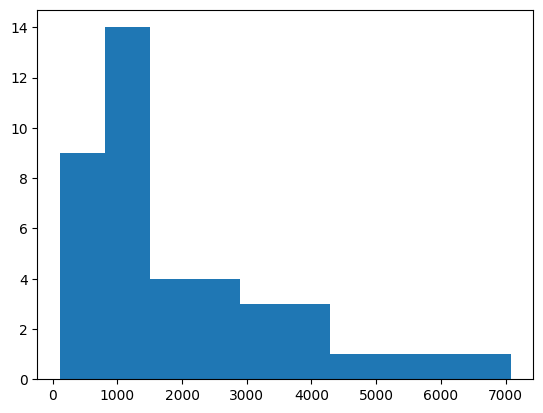

In [97]:
time_between_event_trigggers = []
t = 0
for f in starting_frames_raw:
    time_between_event_trigggers.append(f-t)
    t = f
plt.hist(time_between_event_trigggers, 10)

(array([53.,  4.,  7.,  4.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  10. ,  237.4,  464.8,  692.2,  919.6, 1147. , 1374.4, 1601.8,
        1829.2, 2056.6, 2284. , 2511.4, 2738.8, 2966.2, 3193.6, 3421. ,
        3648.4, 3875.8, 4103.2, 4330.6, 4558. ]),
 <BarContainer object of 20 artists>)

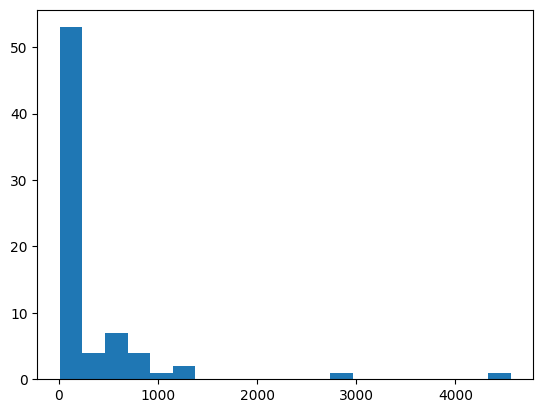

In [92]:
plt.hist(event_duration, 20)

In [378]:
from tqdm import tqdm

# cap = cv2.VideoCapture(r"C:\Users\tanji\Desktop\recordings\evaluation\2025-05-01_12-37-19.mp4_annotated.mp4")
contour_area = np.linspace(0, 9000, 10)
pixel_count_thresholds = np.linspace(0, 10000, 101)


# event_triggered = np.zeros((10, 11767))
event_triggered = np.zeros((10, 11767))


cap = cv2.VideoCapture(r"C:\Users\tanji\Desktop\recordings\evaluation\7_annotated.mp4")
old_frame = None
frame_number = 71600
while True:
    print(frame_number)
    ret, frame = cap.read()

    if not ret:
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.GaussianBlur(frame, (21, 21), 0)
    
    if old_frame is None:
        old_frame = frame
    
    diff = cv2.absdiff(old_frame, frame)
    _, thresh = cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)
    thresh = cv2.dilate(thresh, None, iterations=2)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # big_contours = []
    for i, ca in enumerate(contour_area):
        for c in contours:
            if cv2.contourArea(c) > ca:  # <-- Tune this value
                # big_contours.append(c)
                event_triggered[i, frame_number-71600] = 1
                break
    # img = cv2.drawContours(frame, big_contours, -1, (0,255,75), 2)
    # cv2.imshow("frame", img)
    # if cv2.waitKey(1) == ord("q"):
    #     break
    # for i, pct in enumerate(pixel_count_thresholds):
    #     if np.sum(thresh/255) > pct:
    #         event_triggered[i, frame_number-71600] = 1

    frame_number += 1
    
    old_frame = frame

cv2.destroyAllWindows()
cap.release()

71600
71601
71602
71603
71604
71605
71606
71607
71608
71609
71610
71611
71612
71613
71614
71615
71616
71617
71618
71619
71620
71621
71622
71623
71624
71625
71626
71627
71628
71629
71630
71631
71632
71633
71634
71635
71636
71637
71638
71639
71640
71641
71642
71643
71644
71645
71646
71647
71648
71649
71650
71651
71652
71653
71654
71655
71656
71657
71658
71659
71660
71661
71662
71663
71664
71665
71666
71667
71668
71669
71670
71671
71672
71673
71674
71675
71676
71677
71678
71679
71680
71681
71682
71683
71684
71685
71686
71687
71688
71689
71690
71691
71692
71693
71694
71695
71696
71697
71698
71699
71700
71701
71702
71703
71704
71705
71706
71707
71708
71709
71710
71711
71712
71713
71714
71715
71716
71717
71718
71719
71720
71721
71722
71723
71724
71725
71726
71727
71728
71729
71730
71731
71732
71733
71734
71735
71736
71737
71738
71739
71740
71741
71742
71743
71744
71745
71746
71747
71748
71749
71750
71751
71752
71753
71754
71755
71756
71757
71758
71759
71760
71761
71762
71763
71764
71765
7176

In [ ]:
# np.save(r"data\triggered_events_for_may_01_prelim.npy", event_triggered)

In [379]:
from sklearn.metrics import confusion_matrix

key_frames_raw = [71600,71668,72175,72196,73034,73093,73799,73825,75222,75490,80327,80351,80983,81040,82485,82518,83006,83097]
# event_triggered = np.load(r"data\triggered_events_for_may_01_prelim.npy")

is_correct_key_frames = []
for i in range(0, 17, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))
is_correct_key_frames = np.array(is_correct_key_frames)-71600

ground_truth_events = np.zeros(11766)
ground_truth_events[is_correct_key_frames] = 1

tn_fp_fn_tp = np.zeros((4, 10))
precision_scores = np.zeros(10)
recall_scores = np.zeros(10)
f2_scores = np.zeros(10)


for i in range(10):
    tn, fp, fn, tp = confusion_matrix(ground_truth_events, event_triggered[i, 1:]).ravel()
    tn_fp_fn_tp[:, i] = [tn, fp, fn, tp]
    print(tn, fp, fn, tp)
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f2 = 5/((4/precision)+(1/recall))
    
    # precision, recall, f2, _ = precision_recall_fscore_support(ground_truth_events, event_triggered[i,:], beta=2)
    # print(precision)
    precision_scores[i] = precision
    recall_scores[i] = recall
    f2_scores[i] = f2

8646 2464 71 585
10262 848 276 380
10443 667 317 339
10611 499 344 312
10793 317 367 289
10891 219 395 261
10943 167 409 247
10980 130 421 235
10991 119 432 224
10997 113 439 217


In [ ]:
# higher_events_triggered = np.load(r"data\triggered_events_for_may_01_prelim.npy")
# pr_graph_total = np.vstack([pr_graph_low,pr_graph])
# print(pr_graph_total)

# pr_abs_value = np.column_stack([recall_scores, precision_scores])
# print(pr_abs_value)
# pr_abs_value = pr_abs_value[pr_abs_value[:, 0].argsort()]
# print(pr_abs_value)

# pr_low = np.column_stack([recall_scores, precision_scores])
# print(pr_low)
# pr_low = pr_low[pr_low[:, 0].argsort()]
# print(pr_low)

# pr_high = np.column_stack([recall_scores, precision_scores])
# print(pr_high)
# pr_high = pr_high[pr_high[:, 0].argsort()]
# print(pr_high)

# pr_con = np.vstack([pr_low, pr_high])
# print(pr_con)
# pr_con = pr_con[pr_con[:, 0].argsort()]
# print(pr_con)

# print(precision_scores)
# print(recall_scores)
# print(f2_scores)
# print(tn_fp_fn_tp_copy[10:])
# pr_graph = zip(recall_scores, precision_scores)
# pr_graph_total = np.array(np.sort(pr_graph_total, axis=0))
# print(pr_graph_total)

[[1.         0.05609714]
 [0.99542683 0.14367437]
 [0.96189024 0.17123474]
 [0.92987805 0.17428571]
 [0.9054878  0.17568767]
 [0.8902439  0.17777778]
 [0.86585366 0.17711257]
 [0.84603659 0.17742967]
 [0.82926829 0.17824377]
 [0.81097561 0.17828418]
 [0.80487805 0.17959184]
 [0.78963415 0.17986111]
 [0.77591463 0.18049645]
 [0.76829268 0.18327273]
 [0.76371951 0.18562431]
 [0.75762195 0.18733509]
 [0.75152439 0.19064192]
 [0.73628049 0.19220056]
 [0.73018293 0.19455727]
 [0.7195122  0.19650291]
 [0.71493902 0.20008532]
 [0.71189024 0.20384112]
 [0.70884146 0.20749665]
 [0.7027439  0.21040621]
 [0.69664634 0.21526142]
 [0.6875     0.21776919]
 [0.67987805 0.21938023]
 [0.67073171 0.22323694]
 [0.66310976 0.2258567 ]
 [0.6570122  0.22901169]
 [0.6570122  0.23309897]
 [0.65243902 0.23581267]
 [0.64786585 0.23903262]
 [0.64481707 0.24199085]
 [0.64176829 0.24562427]
 [0.63567073 0.24821429]
 [0.62957317 0.25167581]
 [0.62347561 0.2551466 ]
 [0.61737805 0.25895141]
 [0.61280488 0.26103896]


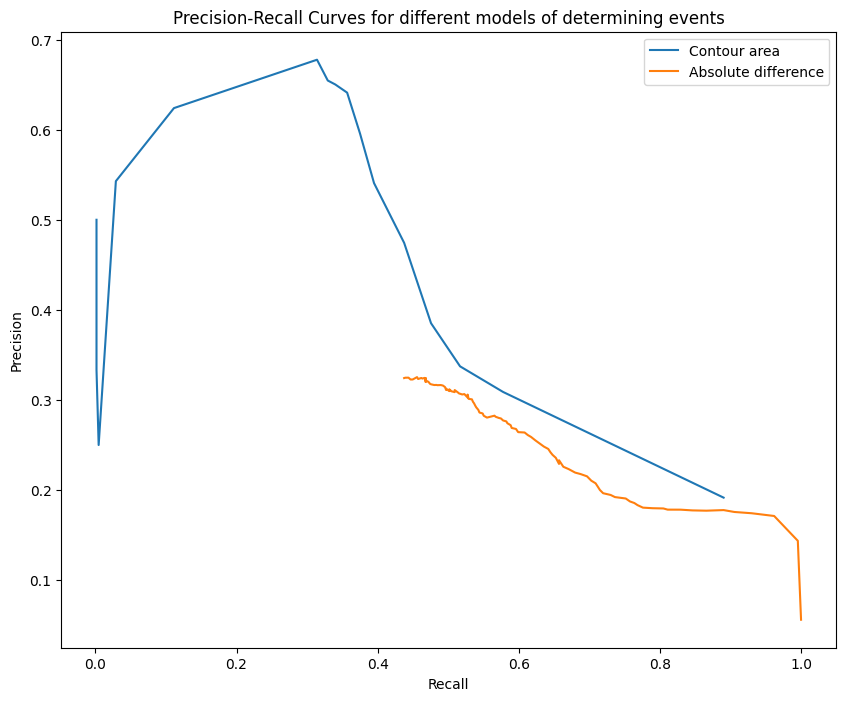

In [372]:
plt.figure(figsize=(10, 8))
# plt.plot(np.linspace(1000, 9000, 10), f2_scores, "o-")
plt.title('Precision-Recall Curves for different models of determining events')
plt.plot(pr_con[3:,0], pr_con[3:,1], label="Contour area")
plt.plot(pr_abs_value[:,0], pr_abs_value[:, 1], label="Absolute difference")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# plt.colorbar(label='F2 score')

# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# plt.xticks(ticks=np.linspace(1, 3, 10), labels=np.linspace(0, 3, 10))
plt.show()



In [ ]:
# f2_abs = f2_scores.copy()
# # print(pr_graph_total)
print(precision_scores)
print(recall_scores)
print(f2_abs)
# print(contour_area)

[0.05609714 0.14367437 0.17123474 0.17428571 0.17568767 0.17777778
 0.17711257 0.17742967 0.17824377 0.17828418 0.17959184 0.17986111
 0.18049645 0.18327273 0.18562431 0.18733509 0.19064192 0.19220056
 0.19455727 0.19650291 0.20008532 0.20384112 0.20749665 0.21040621
 0.21526142 0.21776919 0.21938023 0.22323694 0.2258567  0.22901169
 0.23309897 0.23581267 0.23903262 0.24199085 0.24562427 0.24821429
 0.25167581 0.2551466  0.25895141 0.26103896 0.26388889 0.26429052
 0.26780822 0.26893676 0.27202255 0.27415891 0.27621114 0.27724945
 0.27946627 0.28005975 0.28139183 0.28255903 0.28043143 0.28247261
 0.28503563 0.28605769 0.28896104 0.29183842 0.29392173 0.2962963
 0.29796265 0.30068729 0.30121528 0.30271216 0.30592396 0.30652368
 0.30610413 0.30727273 0.30832571 0.30868762 0.31098696 0.30963517
 0.30979284 0.31184834 0.3110687  0.31255992 0.31431335 0.31604697
 0.31656805 0.31641791 0.31668332 0.31658291 0.31739573 0.31799591
 0.31958763 0.32053942 0.32083333 0.32012513 0.32112971 0.32247

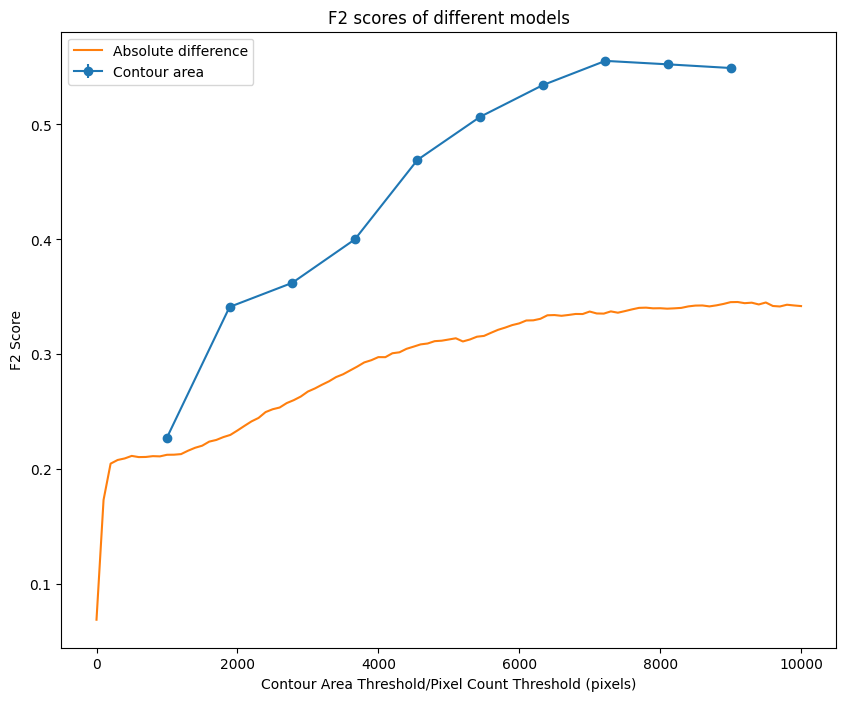

In [383]:
plt.figure(figsize=(10, 8))
# plt.plot(np.linspace(1000, 9000, 10), f2_scores, "o-")
plt.title('F2 scores of different models')
plt.xlabel('Contour Area Threshold/Pixel Count Threshold (pixels)')
plt.errorbar(np.linspace(1000, 9000, 10), f2_scores, yerr=[0.0005, 0.0008, 0.0009, 0.001, 0.001,0.001, 0.001, 0.001, 0.001, 0.001], fmt="o-", label="Contour area")
plt.plot(np.linspace(0, 10000, 101), f2_abs, label="Absolute difference")

plt.ylabel('F2 Score')
plt.legend()
# plt.colorbar(label='F2 score')

# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# plt.xticks(ticks=np.linspace(1, 3, 10), labels=np.linspace(0, 3, 10))
plt.show()

tn   fp   fn tp
8646 2464 72 584
10262 848 277 379
10444 666 317 339
10612 498 344 312
10792 318 369 287
10890 220 397 259
10943 167 410 246
10979 131 422 234
10990 120 433 223
10996 114 440 216

# Bootstrapping Confusion matrix

In [749]:
from scipy.stats import binom, t, sem
from sklearn import metrics
import math

total = 164160
TP = 75
FP = 33
FN = 8

probability_of_event = (TP+FN)/total
probability_of_det = TP/(TP+FN)
probability_of_det_non_event = FP/(total-TP-FN)

events = binom.rvs(total, probability_of_event, size=1000)
TP = binom.rvs(events, probability_of_det)
FN = events-TP
FP = binom.rvs((total-events), probability_of_det_non_event)
TN = total - events - FP

accuracy = TP/(TP+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*(precision*recall)/(precision+recall)
F2 = 5/((4/precision)+(1/recall))
MCC = (TP*TN - FP*FN) / (((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**(0.5))

print(t.interval(0.95, len(accuracy)-1, loc=np.mean(accuracy), scale=sem(accuracy))-accuracy.mean())
print(t.interval(0.95, len(precision)-1, loc=np.mean(precision), scale=sem(precision))-precision.mean())
print(t.interval(0.95, len(recall)-1, loc=np.mean(recall), scale=sem(recall))-recall.mean())
print(t.interval(0.95, len(F1)-1, loc=np.mean(F1), scale=sem(F1))-F1.mean())
# print(t.interval(0.95, len(F2)-1, loc=np.mean(F2), scale=sem(F2))-F2.mean())
print(t.interval(0.95, len(MCC)-1, loc=np.mean(MCC), scale=sem(MCC))-MCC.mean())



[-0.00269272  0.00269272]
[-0.00265947  0.00265947]
[-0.0019884  0.0019884]
[-0.00199241  0.00199241]
[-0.00189668  0.00189668]


In [ ]:
from scipy.stats import uniform

time_error = 0.0001
energy_error = 0.5

time_measurement = [4.4294, 9.4908]
energy_measurement = [22912]

uniform.rvs(size=1000)


array([8.73111321e-01, 9.06047368e-01, 5.34004541e-03, 1.93751237e-01,
       5.50473979e-01, 9.77087305e-01, 5.29926893e-02, 1.60701164e-01,
       8.08669410e-01, 9.65385592e-02, 7.17742094e-01, 8.47453857e-01,
       7.37589324e-01, 7.12162145e-01, 3.45506972e-01, 5.02146748e-01,
       8.86571890e-01, 7.22717470e-01, 1.84600534e-01, 3.76486955e-01,
       2.99546233e-01, 9.19324252e-01, 8.29393970e-01, 9.52587802e-01,
       5.08957927e-02, 9.44855511e-01, 6.69413359e-01, 8.29058764e-01,
       3.37684550e-01, 9.58001045e-01, 6.68325623e-02, 7.80747372e-01,
       6.12043360e-01, 1.26825956e-01, 2.38270193e-01, 4.88244298e-01,
       6.63517262e-01, 5.73275274e-01, 3.00281952e-02, 7.19453796e-01,
       5.14359793e-01, 3.07822332e-02, 9.70192065e-01, 2.42645396e-01,
       8.70320503e-01, 4.03733203e-01, 1.46162950e-01, 6.02651697e-01,
       7.78218596e-02, 3.32822976e-01, 4.45156899e-01, 6.76234723e-01,
       5.78962874e-01, 4.86947842e-01, 7.00198864e-01, 6.14109957e-01,
      

# Weighted Pixel Activations

In [8]:
import numpy as np
import cv2

key_frames_raw = np.load(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\key_frames_raw_02_26.npy")
is_correct_key_frames = []
for i in range(0, 182, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))

num_of_pixels_changed = []
cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

pixel_activation_count = np.zeros((height, width))

prev_frame_grey = None
raw_frame_num = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    if prev_frame_grey is None:
        prev_frame_grey = frame_grey  
    
    frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
    
    prev_frame_grey = frame_grey
    
    if raw_frame_num in is_correct_key_frames:
        _, filter_frame = cv2.threshold(frame_difference, 20, 1, cv2.THRESH_BINARY)
        pixel_activation_count += filter_frame
        
    if raw_frame_num == key_frames_raw[-1]:
        break
            
    raw_frame_num += 1

cap.release()
    

In [ ]:
pixel_activation_count_normalised = pixel_activation_count/np.sum(pixel_activation_count)
# np.save(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\pixel_activation_map.npy", pixel_activation_count_normalised)

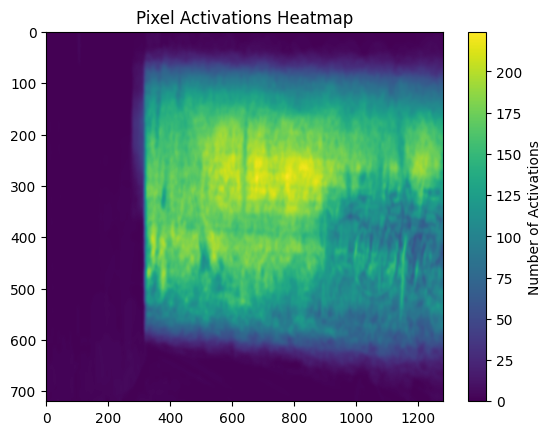

In [41]:
import matplotlib.pyplot as plt

plt.imshow(cv2.GaussianBlur(pixel_activation_count, (19,19), 0), cmap='viridis', aspect="auto")
# plt.imshow(pixel_activation_count, cmap='viridis', aspect="auto")
plt.title('Pixel Activations Heatmap')
# plt.xlabel('Pixel Count Threshold')
# plt.ylabel('Pixel Difference Threshold')
# plt.axis("off")
plt.colorbar(label='Number of Activations')
# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
# plt.yticks(ticks=np.arange(len(pixel_value_thresholds)), labels=np.array(pixel_value_thresholds, dtype=np.int64))
plt.show()

In [42]:
import numpy as np
import cv2

num_of_pixels_changed = []
cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-02-26_14-38-06.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

pixel_count_thresholds = np.linspace(0, 1, 101)
precision_scores = np.zeros(101)
recall_scores = np.zeros(101)
f2_score_scores = np.zeros(101)

for i, threshold in enumerate(pixel_count_thresholds):
    prev_frame_grey = None
    raw_frame_num = 0
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        if prev_frame_grey is None:
            prev_frame_grey = frame_grey  
        
        frame_difference = cv2.absdiff(prev_frame_grey, frame_grey)
        
        prev_frame_grey = frame_grey
        _, filter_frame = cv2.threshold(frame_difference, 20, 1, cv2.THRESH_BINARY)
        
        pixels_changed = np.sum(filter_frame*pixel_activation_count_normalised)
        if pixels_changed > threshold:
            if raw_frame_num in is_correct_key_frames:
                TP += 1
            else:
                FP += 1
        else:
            if raw_frame_num in is_correct_key_frames:
                FN += 1
            else:
                TN += 1

        if raw_frame_num == key_frames_raw[-1]:
            break
                
        raw_frame_num += 1

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
        
    F2 = (1+2**2)*(precision*recall)/((2**2)*precision+recall)
    
    print(f"Precision: {precision}, Recall: {recall}, F2: {F2}")
    
    
    precision_scores[i] = precision
    recall_scores[i] = recall
    f2_scores[i] = F2

cap.release()
    

Precision: 0.04782648710003988, Recall: 0.9987187700192185, F2: 0.20068999253366288


NameError: name 'f2_scores' is not defined

# Machine Learning Classifier

In [ ]:
import torch.nn as nn


# Wide Angle Lens eval

In [ ]:
import cv2
import numpy as np
import yaml
# from ultralytics import YOLO

with open(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\node\config\calibration.yaml", "r") as f:
    config = yaml.safe_load(f)
D = np.array(config["D"])
K = np.array(config["K"])

scaled_K = K
scaled_K[2][2] = 1.0

K2 = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(scaled_K, D, (1280, 720), np.eye(3), balance=1)
map1, map2 = cv2.fisheye.initUndistortRectifyMap(scaled_K, D, np.eye(3), K2, (1280, 720), cv2.CV_16SC2)

raw_cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\2025-04-18_19-17-25.mp4")

width = int(raw_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(raw_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

key_frame_num = np.random.random_integers(0,100, None)

frame_num = 0
while raw_cap.isOpened():
    ret, raw_frame =  raw_cap.read()

    if not ret:
        break
    
    frame = cv2.remap(raw_frame, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    
    
    # cv2.imshow("frame", frame)
    
    if frame_num == key_frame_num:
        cv2.imwrite("Bike shed random frame.png", raw_frame)
        break
    else:
        frame_num += 1

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
raw_cap.release()

C:\Users\tanji\AppData\Local\Temp\ipykernel_58304\1186787608.py:22: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  key_frame_num = np.random.random_integers(0,100, None)


In [16]:
import yaml

raw = cv2.imread("Bike shed random frame.png")
with open(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\node\config\calibration.yaml", "r") as f:
    config = yaml.safe_load(f)
D = np.array(config["D"])
K = np.array(config["K"])

scaled_K = K
scaled_K[2][2] = 1.0

K2 = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(scaled_K, D, (1280, 720), np.eye(3), balance=1)
map1, map2 = cv2.fisheye.initUndistortRectifyMap(scaled_K, D, np.eye(3), K2, (1280, 720), cv2.CV_16SC2)
frame = cv2.remap(raw, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

cv2.imwrite("Bike shed random frame.png", frame)

True

In [17]:
from ultralytics import YOLO

frame = cv2.imread("Bike shed random frame.png")

model = YOLO(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\node\src\models\yolov10n_saved_model\yolov10n_float32.tflite", task="detect")
result = model.predict(frame)[0].plot()
cv2.imwrite(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\Dissertation\Dissertation\first draft\roi_example_random_frame.png", result)


Loading C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\node\src\models\yolov10n_saved_model\yolov10n_float32.tflite for TensorFlow Lite inference...



0: 640x640 1 person, 7 bicycles, 90.0ms
Speed: 5.4ms preprocess, 90.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


True

In [757]:
def mouse_callback(event,x,y,flags,param):
    global ix,iy,drawing, mask, mask_uncomitted, color, initial_img, bike_lot_pts, is_occupied

    if event == cv2.EVENT_LBUTTONDOWN:
        print(x, y)

cap = cv2.VideoCapture(r"C:\Users\tanji\Desktop\recordings\evaluation\events.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

ret, frame = cap.read()
cv2.imshow("frame", frame)
cv2.setMouseCallback('frame', mouse_callback)


while cap.isOpened():    
    cv2.imshow("frame", frame)
    
    if cv2.waitKey(1) == ord("q"):
        break

cv2.destroyAllWindows()
cap.release()
    

157 552
272 530
272 530
272 530
272 530
301 296
301 296
301 296
448 458
448 458
448 458
389 303
389 303
389 303
389 303
363 270


In [759]:
import yaml 

source_points = np.array([[272, 530], [301, 296], [389, 303], [448, 458]], dtype=np.float64)
destination_points = np.array([[350, 0], [940, 0], [940, 290], [450, 290]], dtype=np.float64)

H, status = cv2.findHomography(source_points, destination_points)
with open("H.yaml", "w") as f:
    yaml.dump({"H1": H.tolist()}, f)

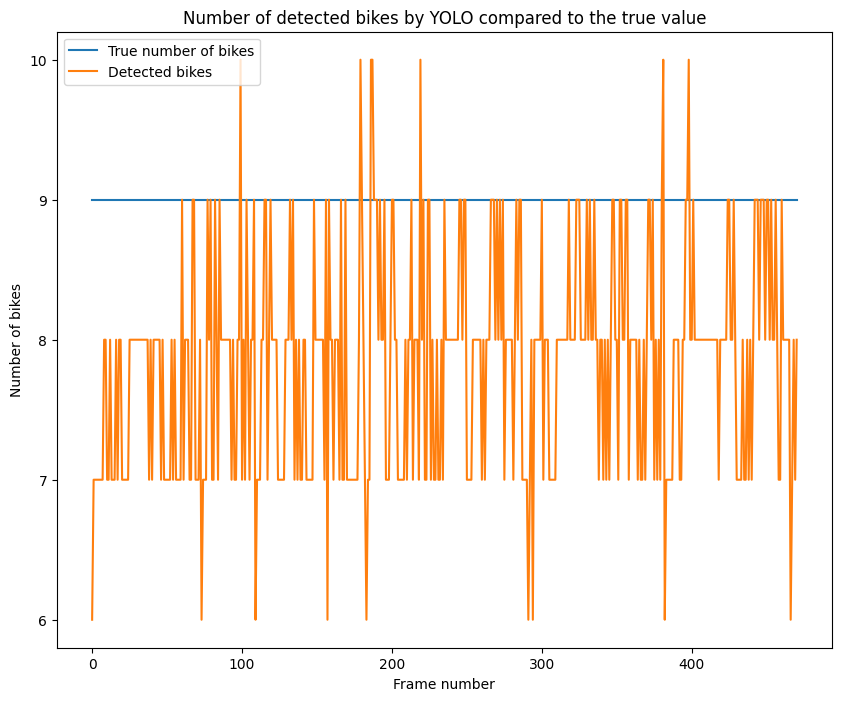

In [777]:
with open(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\cam2.log", "r") as f:
    bikes = []
    for line in f:
        line = line.strip().split()
        if line[-2]=="bikes:":
            bikes.append(int(line[-1]))
            
plt.figure(figsize=(10, 8))
# plt.plot(np.linspace(1000, 9000, 10), f2_scores, "o-")
plt.title('Number of detected bikes by YOLO compared to the true value')
plt.xlabel('Frame number')
plt.plot(np.ones(len(bikes))*9, label="True number of bikes")
plt.plot(bikes, label="Detected bikes")

plt.ylabel('Number of bikes')
plt.legend()
# plt.colorbar(label='F2 score')

# plt.xticks(ticks=np.linspace(0, 100, 11), labels=np.linspace(0, 10000, 11, dtype=np.int64))
plt.yticks(ticks=np.linspace(6, 10, 5, dtype=np.int8))
plt.show()

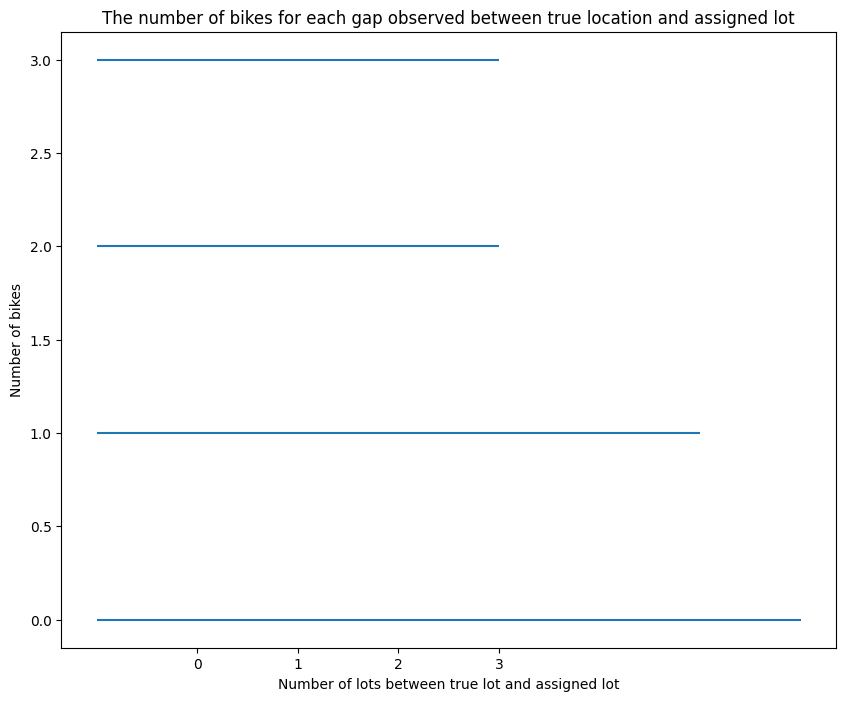

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
# plt.plot(np.linspace(1000, 9000, 10), f2_scores, "o-")
plt.title("The number of bikes for each gap observed between true location and assigned lot")
plt.xlabel('Number of lots between true lot and assigned lot')
# plt.bar([0,1,2,3], [6, 5, 3, 3])

plt.ylabel('Number of bikes')
# plt.legend()
# plt.colorbar(label='F2 score')
plt.hlines([0,1,2,3], xmin=0, xmax=[6, 5, 3, 3])

plt.xticks(ticks=np.linspace(0, 3, 4, dtype=np.int32))
# plt.yticks(ticks=np.linspace(6, 10, 5, dtype=np.int8))
plt.show()

# Saving photos

In [9]:
raw_cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\Untitled video (1).mp4")

width = int(raw_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(raw_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while raw_cap.isOpened():
    ret, raw_frame =  raw_cap.read()

    if not ret:
        break
    
    cv2.imwrite(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\Dissertation\Dissertation\first draft\loi_example.png", raw_frame)
    
    break
    cv2.imshow("frame", frame)
    
    
    # cv2.imwrite("Bike shed undistorted.png", raw_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
raw_cap.release()

# Online analysis

In [10]:
import numpy as np
import cv2
from ultralytics import YOLO

# model = YOLO()

key_frames_raw = np.load(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\key_frames_raw_02_26.npy")
is_correct_key_frames = []
for i in range(0, 182, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))

num_of_pixels_changed = []
cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_raw.mp4")
# cap = cv2.VideoCapture(r"C:\Users\tanji\Desktop\recordings\2025-04-30_13-20-44.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

pixel_activation_count = np.zeros((height, width))

prev_frame_grey = None
raw_frame_num = 0
next_frame = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # if raw_frame_num != next_frame:
    #     raw_frame_num += 1
    #     continue
    
    # if raw_frame_num in is_correct_key_frames:
    #     cv2.imwrite(fr"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\04_30\{raw_frame_num}_numbered.png", frame)        
    
    cv2.imwrite(fr"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\04_30\{raw_frame_num}_numbered.png", frame)        
    
    
    if raw_frame_num == key_frames_raw[-1]:
        break
            
    raw_frame_num += 1
    next_frame += 15

cap.release()
    

KeyboardInterrupt: 

In [23]:
import numpy as np
import cv2
from ultralytics import YOLO

# model = YOLO()

key_frames_raw = np.load(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\key_frames_raw_02_26.npy")
is_correct_key_frames = []
for i in range(0, 182, 2):
    start = key_frames_raw[i]
    stop = key_frames_raw[i+1]
    is_correct_key_frames += list(np.linspace(start, stop, stop-start+1, dtype=np.int64))

num_of_pixels_changed = []
# cap = cv2.VideoCapture(r"C:\Users\tanji\OneDrive\Cambridge\2\Project\recordings\Detections\02-26_raw.mp4")
cap = cv2.VideoCapture(r"C:\Users\tanji\Desktop\recordings\ok recordings\2025-04-30_13-08-54.mp4")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

pixel_activation_count = np.zeros((height, width))

prev_frame_grey = None
raw_frame_num = 0
next_frame = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # if raw_frame_num != next_frame:
    #     raw_frame_num += 1
    #     continue
    
    # if raw_frame_num in is_correct_key_frames:
    #     cv2.imwrite(fr"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\04_30\{raw_frame_num}_numbered.png", frame)        
    cv2.putText(frame, f"{raw_frame_num}", (1150, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)
        
    # cv2.imshow("frame", frame)
    if raw_frame_num == 2710:
        cv2.imwrite(fr"C:\Users\tanji\OneDrive\Cambridge\2\Project\ShedSense\evaluation\data\04_30\{raw_frame_num}_numbered.png", frame)        
    
    
    if raw_frame_num == key_frames_raw[-1]:
        break
            
    raw_frame_num += 1
    next_frame += 15
    
    if cv2.waitKey(1) == ord("q"):
        break

cap.release()
    